In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
import sklearn.metrics

In [2]:
train = pd.read_excel('lendingclub_traindata - Copy.xlsx')
validation = pd.read_excel('lendingclub_valdata - Copy.xlsx')
test = pd.read_excel('lendingclub_testdata - Copy.xlsx')

print(train.head())
print(validation.head())
print(test.head())

   home_ownership    income    dti  fico  loan_status
0               1   44304.0  18.47   690            0
1               0   50000.0  29.62   735            1
2               0   64400.0  16.68   675            1
3               0   38500.0  33.73   660            0
4               1  118000.0  26.66   665            1
   home_ownership    income    dti  fico  loan_status
0               0   25000.0  27.60   660            0
1               0   50000.0  21.51   715            1
2               1  100000.0   8.14   770            1
3               0   75000.0   1.76   685            0
4               1   78000.0  16.11   680            1
   home_ownership    income    dti  fico  loan_status
0               1   52400.0  24.64   665            1
1               1  150000.0  17.04   785            1
2               1  100000.0  20.92   710            1
3               0   97000.0  13.11   705            1
4               1  100000.0  24.08   685            0


In [3]:
x_train = train.drop('loan_status', axis=1)
x_val = validation.drop('loan_status', axis=1)
x_test = test.drop('loan_status', axis=1)

y_train = train['loan_status']
y_val = validation['loan_status']
y_test = test['loan_status']

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(7000, 4) (7000,)
(3000, 4) (3000,)
(2290, 4) (2290,)


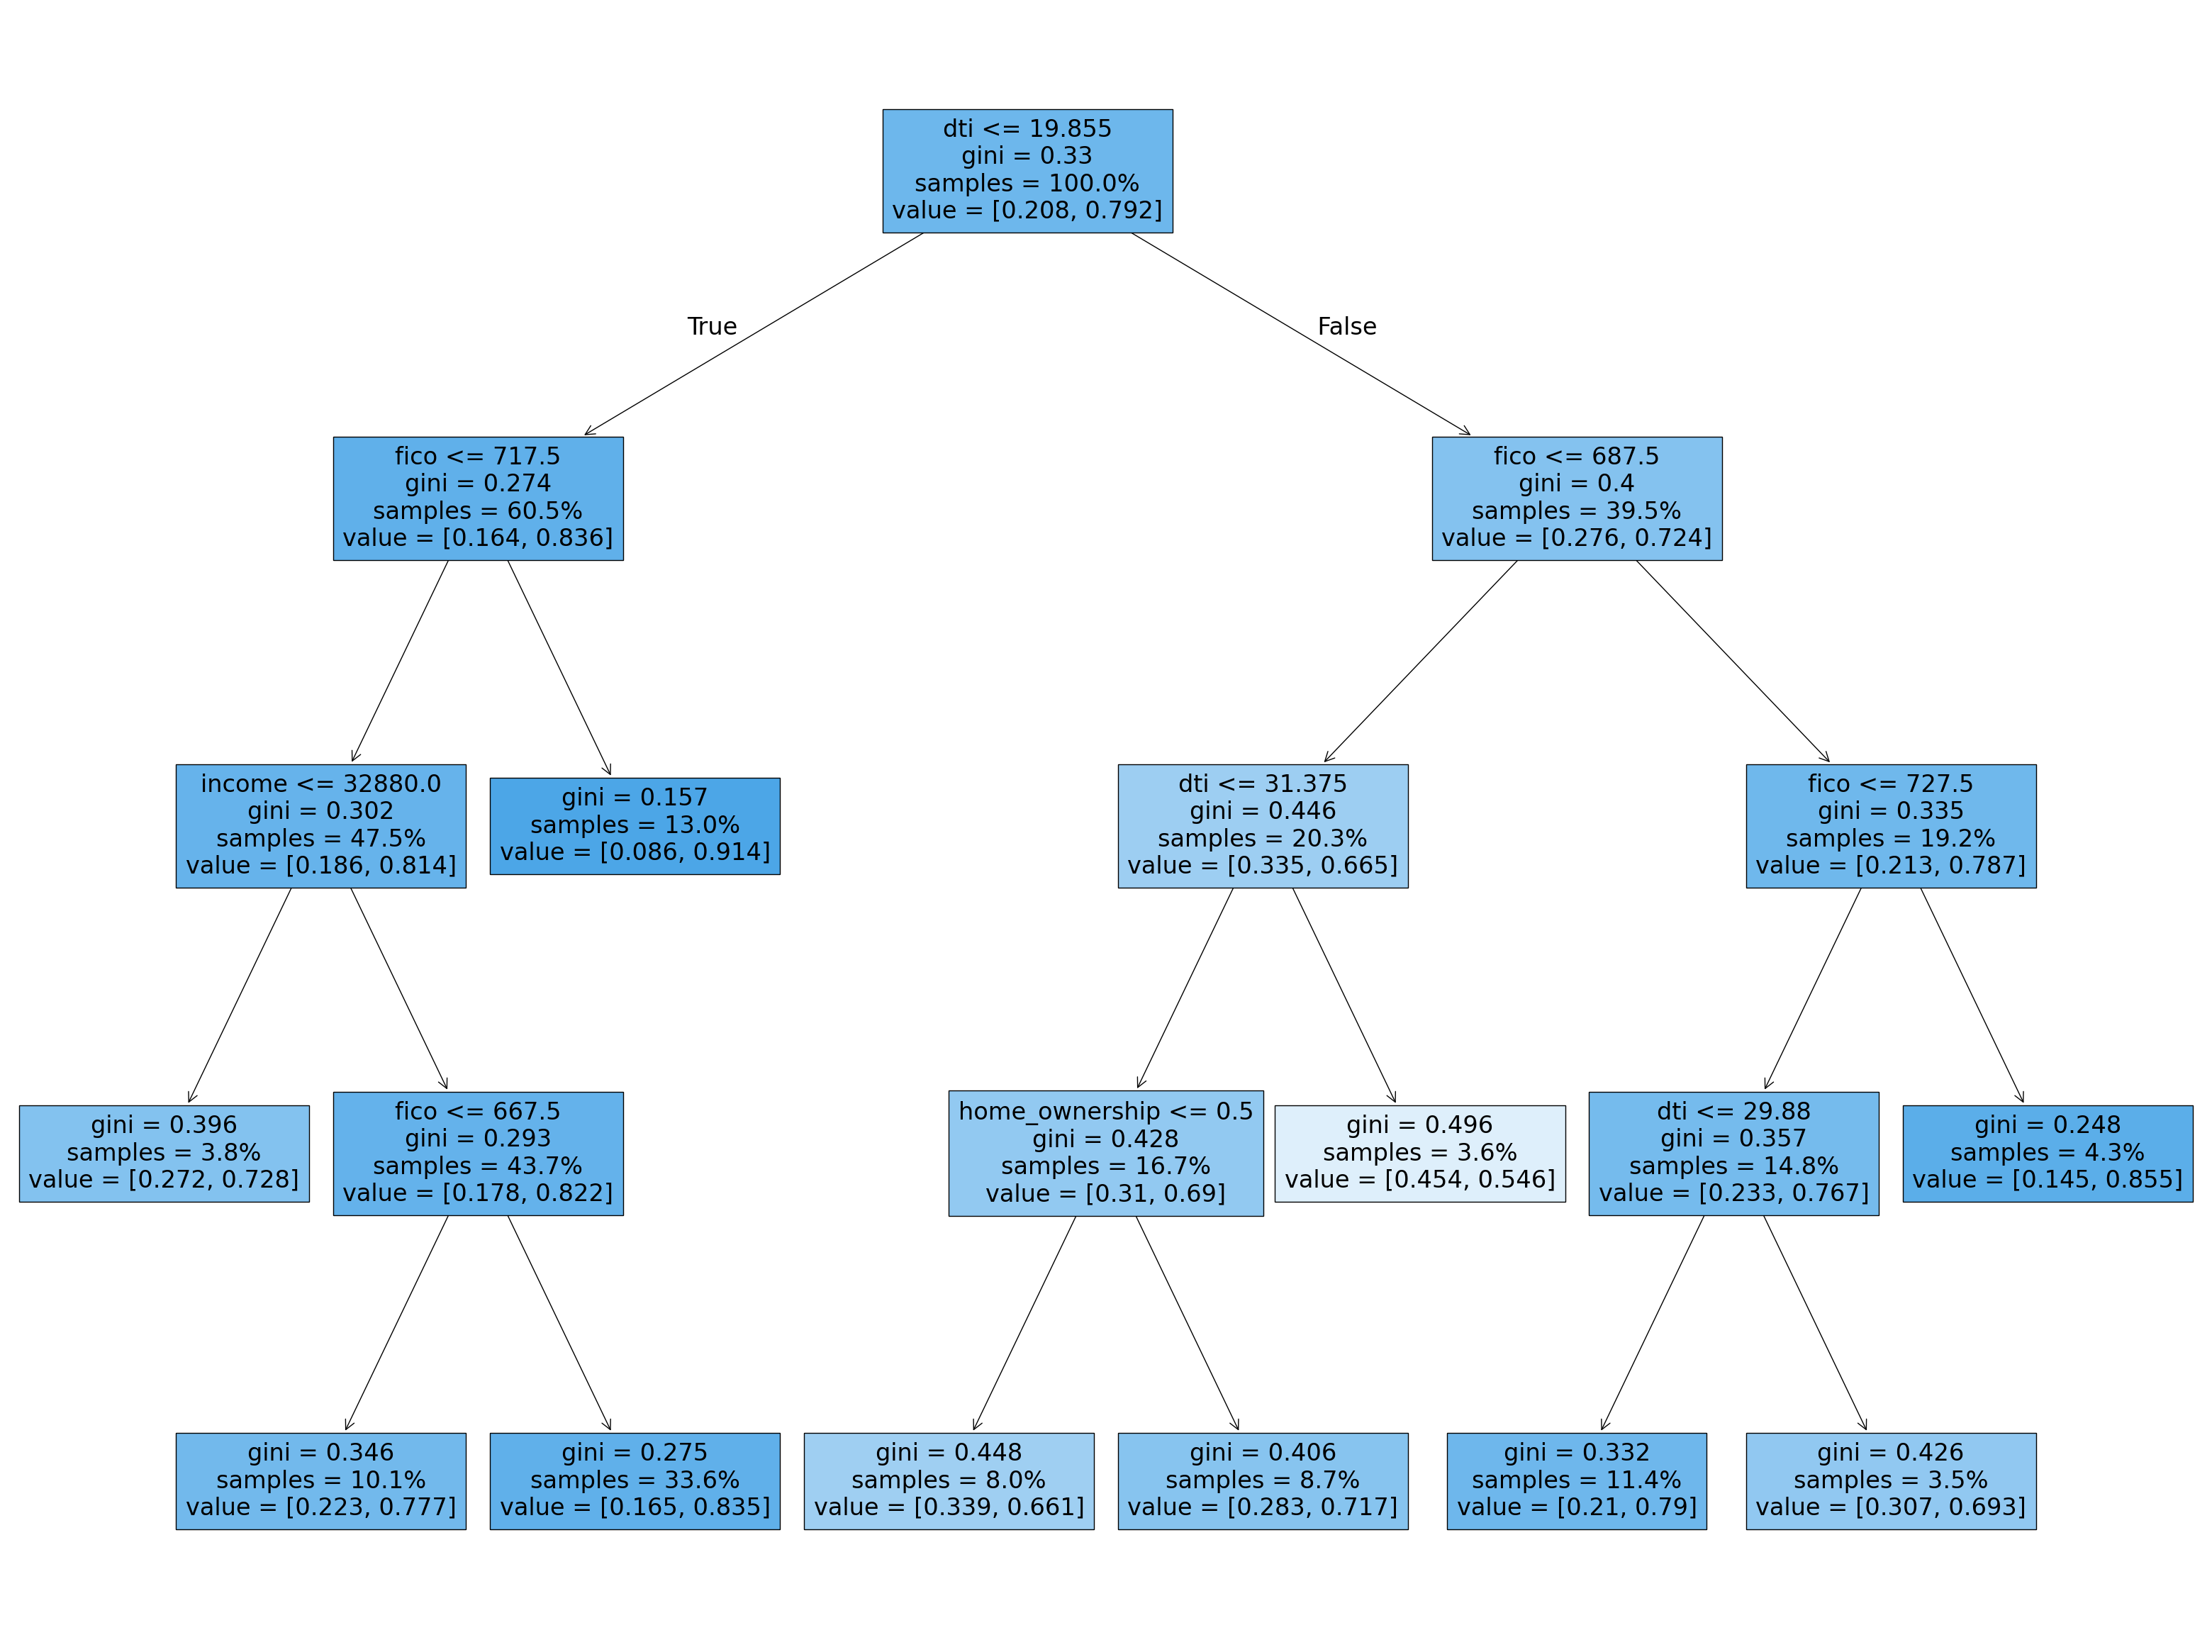

In [4]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=1000, min_samples_leaf=200, random_state=0)
clf = clf.fit(x_train, y_train)
flg, ax = plt.subplots(figsize = (40, 30))
plot_tree(clf, filled=True, feature_names=x_train.columns, proportion=True)
plt.show()

In [6]:
y_train_pred = clf.predict_proba(x_train)
y_val_pred = clf.predict_proba(x_val)
y_test_pred = clf.predict_proba(x_test)

print(y_train_pred)

mle_vector_train = np.log(np.where(y_train == 1, y_train_pred[:,1], y_train_pred[:,0]))
mle_vector_val = np.log(np.where(y_val == 1, y_val_pred[:,1], y_val_pred[:,0]))
mle_vector_test = np.log(np.where(y_test == 1, y_test_pred[:,1], y_test_pred[:,0]))

cost_function_training = np.negative(np.sum(mle_vector_train)/len(y_train))
cost_function_val = np.negative(np.sum(mle_vector_val)/len(y_val))
cost_function_test = np.negative(np.sum(mle_vector_test)/len(y_test))

print('cost function training set =', cost_function_training)
print('cost function validation set =', cost_function_val)
print('cost function test set =', cost_function_test)


[[0.16475096 0.83524904]
 [0.14473684 0.85526316]
 [0.16475096 0.83524904]
 ...
 [0.16475096 0.83524904]
 [0.30737705 0.69262295]
 [0.16475096 0.83524904]]
cost function training set = 0.48994592462477693
cost function validation set = 0.48867454659304227
cost function test set = 0.49075126861928586
